In [1]:
import numpy as np 
import os 
import matplotlib.pyplot as plt 
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
import tensorflow as tf
from tensorflow.keras.regularizers import l1,l2
from tensorflow.keras.callbacks import EarlyStopping


In [2]:
data_path="D:/Project AI/Bone Break Dataset/Bone Break Classification/Bone Break Classification"

In [3]:
class_name=os.listdir(data_path)
class_name

['Avulsion fracture',
 'Comminuted fracture',
 'Fracture Dislocation',
 'Greenstick fracture',
 'Hairline Fracture',
 'Impacted fracture',
 'Longitudinal fracture',
 'Oblique fracture',
 'Pathological fracture',
 'Spiral Fracture']

In [4]:
def plot_image(class_name):
    plt.figure(figsize=(15,8))
    for i,category in enumerate(class_name):
        image_path=data_path+'/'+category
        image_in_folder=os.listdir(image_path)
        
        first_img=image_in_folder[1]
        first_img_path=image_path+'/'+first_img
        
        img=image.load_img(first_img_path)
        img_arr=image.img_to_array(img)/255
        
        plt.subplot(2,5,i+1)
        plt.imshow(img_arr)
        plt.title(category)
        plt.axis('off')
        plt.grid()
    plt.show()

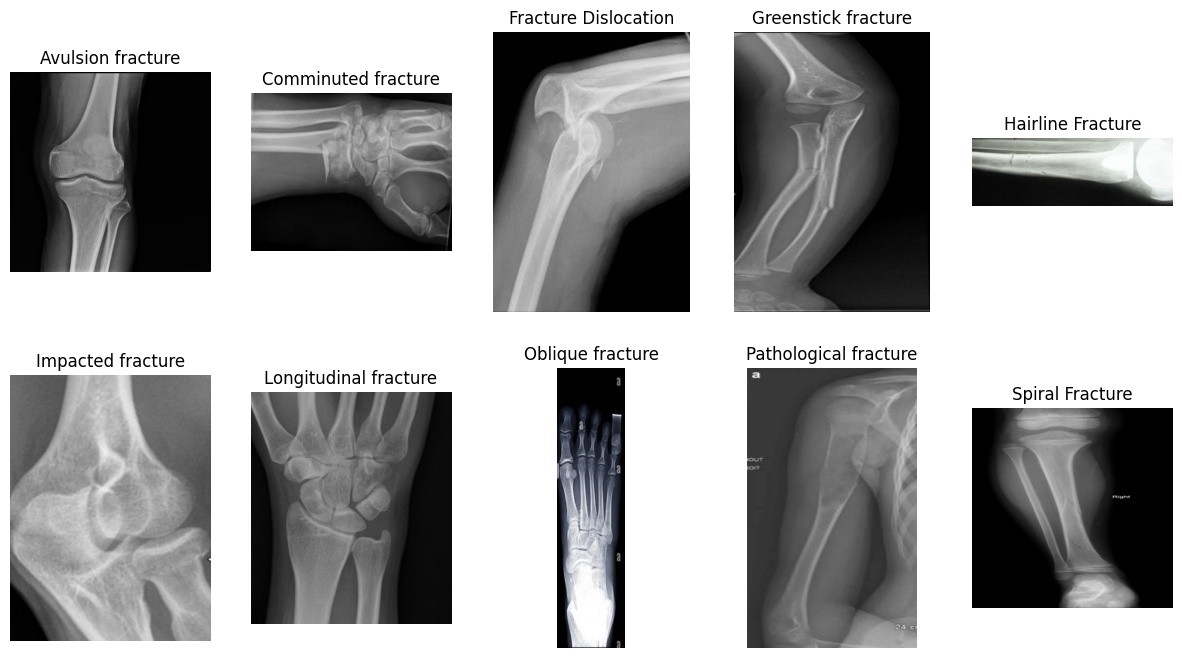

In [5]:
plot_image(class_name)

In [33]:
data_generator=ImageDataGenerator(    rescale=1.0/255,
    validation_split=0.2)

In [34]:
train_data=data_generator.flow_from_directory(data_path,
                                              batch_size=32,
                                              target_size=(224,224),
                                              class_mode='categorical',
                                              subset='training',
                                              shuffle=True
                                              )

Found 3617 images belonging to 10 classes.


In [35]:
test_data=data_generator.flow_from_directory(data_path,
                                              batch_size=1,
                                              target_size=(224,224),
                                              class_mode='categorical',
                                              subset='validation',
                                              shuffle=True
                                              )

Found 899 images belonging to 10 classes.


In [36]:
model=Sequential()
weight_decay=0.001

model.add(Conv2D(32,3,padding='same',activation='relu',kernel_regularizer=l2(weight_decay),input_shape=[224,224,3]))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.3))

model.add(Conv2D(32,3,padding='same',activation='relu',kernel_regularizer=l2(weight_decay)))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.4))



model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [37]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [38]:
es=EarlyStopping(patience=5,monitor='loss')

In [39]:
model_hist=model.fit(train_data,validation_data=test_data,epochs=5,callbacks=[es])

Epoch 1/5
114/114 ━━━━━━━━━━━━━━━━━━━━ 25s 206ms/step - accuracy: 0.1752 - loss: 2.4137 - val_accuracy: 0.3626 - val_loss: 1.8014
Epoch 2/5
114/114 ━━━━━━━━━━━━━━━━━━━━ 24s 204ms/step - accuracy: 0.5946 - loss: 1.2986 - val_accuracy: 0.8432 - val_loss: 0.6493
Epoch 3/5
114/114 ━━━━━━━━━━━━━━━━━━━━ 24s 205ms/step - accuracy: 0.9205 - loss: 0.3685 - val_accuracy: 0.9466 - val_loss: 0.1631
Epoch 4/5
114/114 ━━━━━━━━━━━━━━━━━━━━ 24s 204ms/step - accuracy: 0.9886 - loss: 0.1127 - val_accuracy: 0.9967 - val_loss: 0.0686
Epoch 5/5
114/114 ━━━━━━━━━━━━━━━━━━━━ 24s 205ms/step - accuracy: 0.9889 - loss: 0.0992 - val_accuracy: 0.9911 - val_loss: 0.1029


In [48]:
loos,acc=model.evaluate(train_data)
print(f'Accuracy of Training is: {acc}')

114/114 ━━━━━━━━━━━━━━━━━━━━ 7s 62ms/step - accuracy: 0.9905 - loss: 0.0697
Accuracy of Training is: 0.9889411330223083


In [49]:
loss,acc=model.evaluate(test_data)
print(f'Accuracy of Testing is: {acc}')

899/899 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9908 - loss: 0.0958
Accuracy of Testing is: 0.9911012053489685


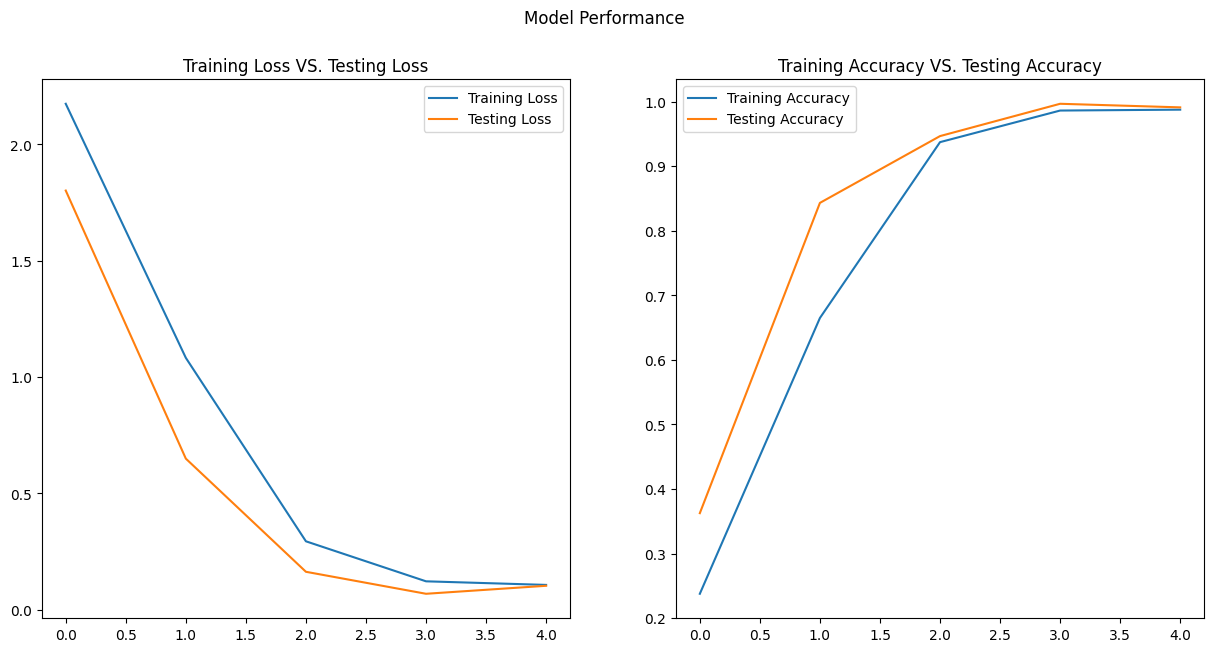

In [47]:
fig,ax=plt.subplots(1,2,figsize=(15,7))
fig.suptitle('Model Performance')
ax[0].plot(model_hist.history['loss'],label='Training Loss')
ax[0].plot(model_hist.history['val_loss'],label='Testing Loss')
ax[0].set_title('Training Loss VS. Testing Loss')
ax[0].legend()

ax[1].plot(model_hist.history['accuracy'],label='Training Accuracy')
ax[1].plot(model_hist.history['val_accuracy'],label='Testing Accuracy')
ax[1].set_title('Training Accuracy VS. Testing Accuracy')
ax[1].legend()

plt.show()

In [50]:
class_map=dict([value,key]for key,value in train_data.class_indices.items())
class_map

{0: 'Avulsion fracture',
 1: 'Comminuted fracture',
 2: 'Fracture Dislocation',
 3: 'Greenstick fracture',
 4: 'Hairline Fracture',
 5: 'Impacted fracture',
 6: 'Longitudinal fracture',
 7: 'Oblique fracture',
 8: 'Pathological fracture',
 9: 'Spiral Fracture'}

In [61]:
image_path="D:/Image/Fracture Dislocation.png"

In [62]:
def predication(actual_label,image_path):
    img=image.load_img(image_path,target_size=(224,224))
    img_arr=image.img_to_array(img)/255
    
    predict_img=img_arr.reshape((1,img_arr.shape[0],
                                 img_arr.shape[1],
                                 img_arr.shape[2]))
    
    predication_label=np.argmax(model.predict(predict_img))
    predicate=class_map[predication_label]
    
    plt.figure(figsize=(10,5))
    plt.imshow(img_arr)
    plt.title(f"Actual Label is: {actual_label} | Predication Label is: {predicate}")
    plt.axis('off')
    plt.grid()
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


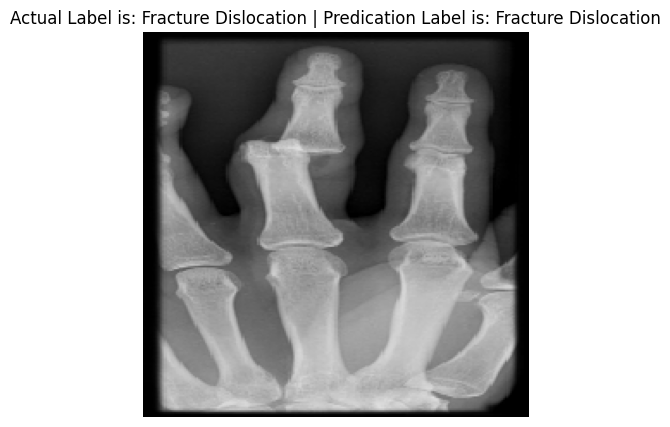

In [63]:
predication('Fracture Dislocation',image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


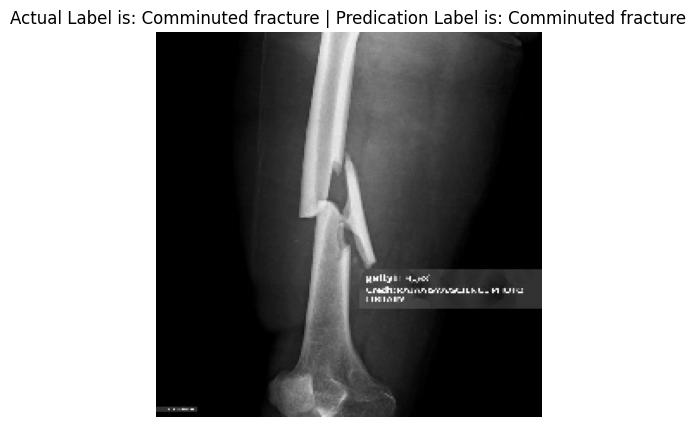

In [67]:
image_path="D:/Image/Comminuted fracture.jpg"
predication('Comminuted fracture',image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


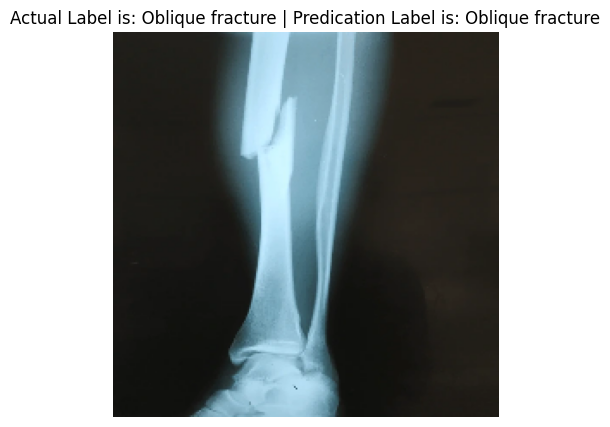

In [83]:
image_path="D:/Image/sabu-raijua-general-hospital-regency-600nw-1839626560.webp"
predication('Oblique fracture',image_path)